In [1]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


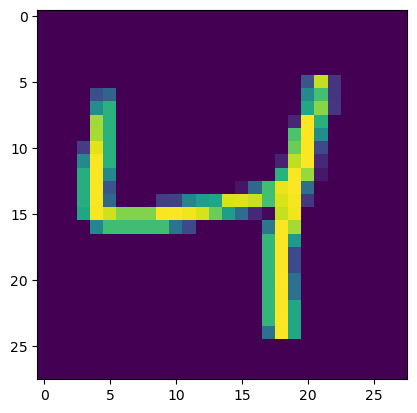

In [4]:
plt.imshow(X_train[2])

In [5]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9118 - loss: 0.6634 - val_accuracy: 0.9750 - val_loss: 0.0786
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9791 - loss: 0.0689 - val_accuracy: 0.9765 - val_loss: 0.0787
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9848 - loss: 0.0498 - val_accuracy: 0.9808 - val_loss: 0.0610
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9869 - loss: 0.0411 - val_accuracy: 0.9796 - val_loss: 0.0652
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9904 - loss: 0.0319 - val_accuracy: 0.9785 - val_loss: 0.0787
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9821 - val_loss: 0.0726
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9912 - loss: 0.0254 - val_accuracy: 0.9843 - val_loss: 0.0705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9930 - loss

In [13]:
import pickle
# Save the trained model
model.save(r'D:\Collage\B.E\handwritten.h5')

# Save the training history
with open(r'D:\Collage\B.E\handwritten_history.pkl', 'wb') as history_file:
    pickle.dump(hist.history, history_file)

<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\kavad\AppData\Local\Temp\ipykernel_23704\198241884.py:6: SyntaxWarning: invalid escape sequence '\C'
  history_file_path = 'D:\Collage\B.E\handwritten_history.pkl'


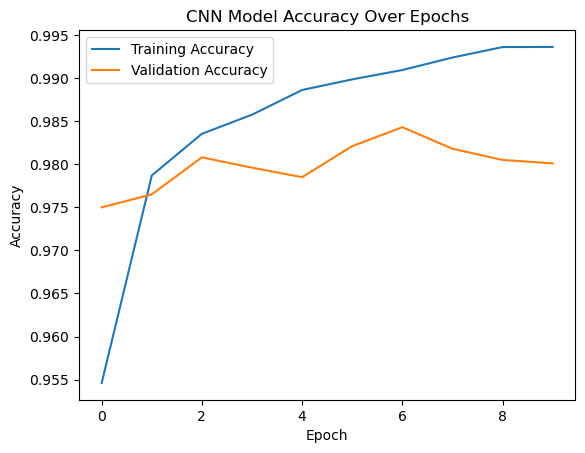

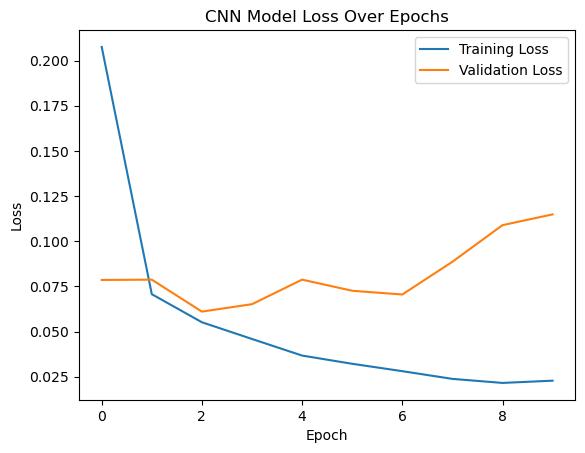

In [14]:
import os
import pickle
import matplotlib.pyplot as plt

# Load the training history from the pickle file
history_file_path = 'D:\Collage\B.E\handwritten_history.pkl'
with open(history_file_path, 'rb') as history_file:
    history = pickle.load(history_file)

# Create a "graphs" folder if it doesn't exist
# graphs_dir = '/content/drive/MyDrive/Chest CT-Scan/sharpened_dataset/graphs'
# os.makedirs(graphs_dir, exist_ok=True)

# Define the model filename (without extension)
model_filename = 'model'

# Plot model accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy Over Epochs')
plt.legend()
accuracy_plot_filename = f'{model_filename}_Accuracy.png'
# plt.savefig(os.path.join(graphs_dir, accuracy_plot_filename))
plt.show()

# Plot model loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Model Loss Over Epochs')
plt.legend()
loss_plot_filename = f'{model_filename}_Loss.png'
# plt.savefig(os.path.join(graphs_dir, loss_plot_filename))
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


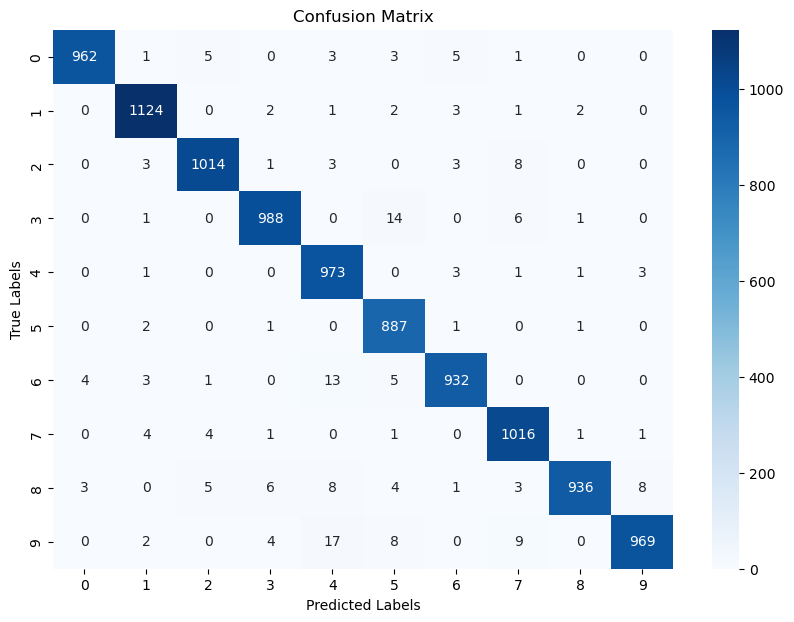

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class with highest probability

cm = confusion_matrix(y_test, y_pred_classes)

# 8. Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
